In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')
import os


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission_format = pd.read_csv('Sample_submission.csv')

In [3]:
new_train=train.copy()

In [4]:
for col in new_train.columns:
    if(isinstance(train[col][0],str)):
        new_train[col] = LabelEncoder().fit_transform(new_train[col])

In [5]:
new_train = new_train.drop(['Id','EmployeeNumber'],axis = 1)

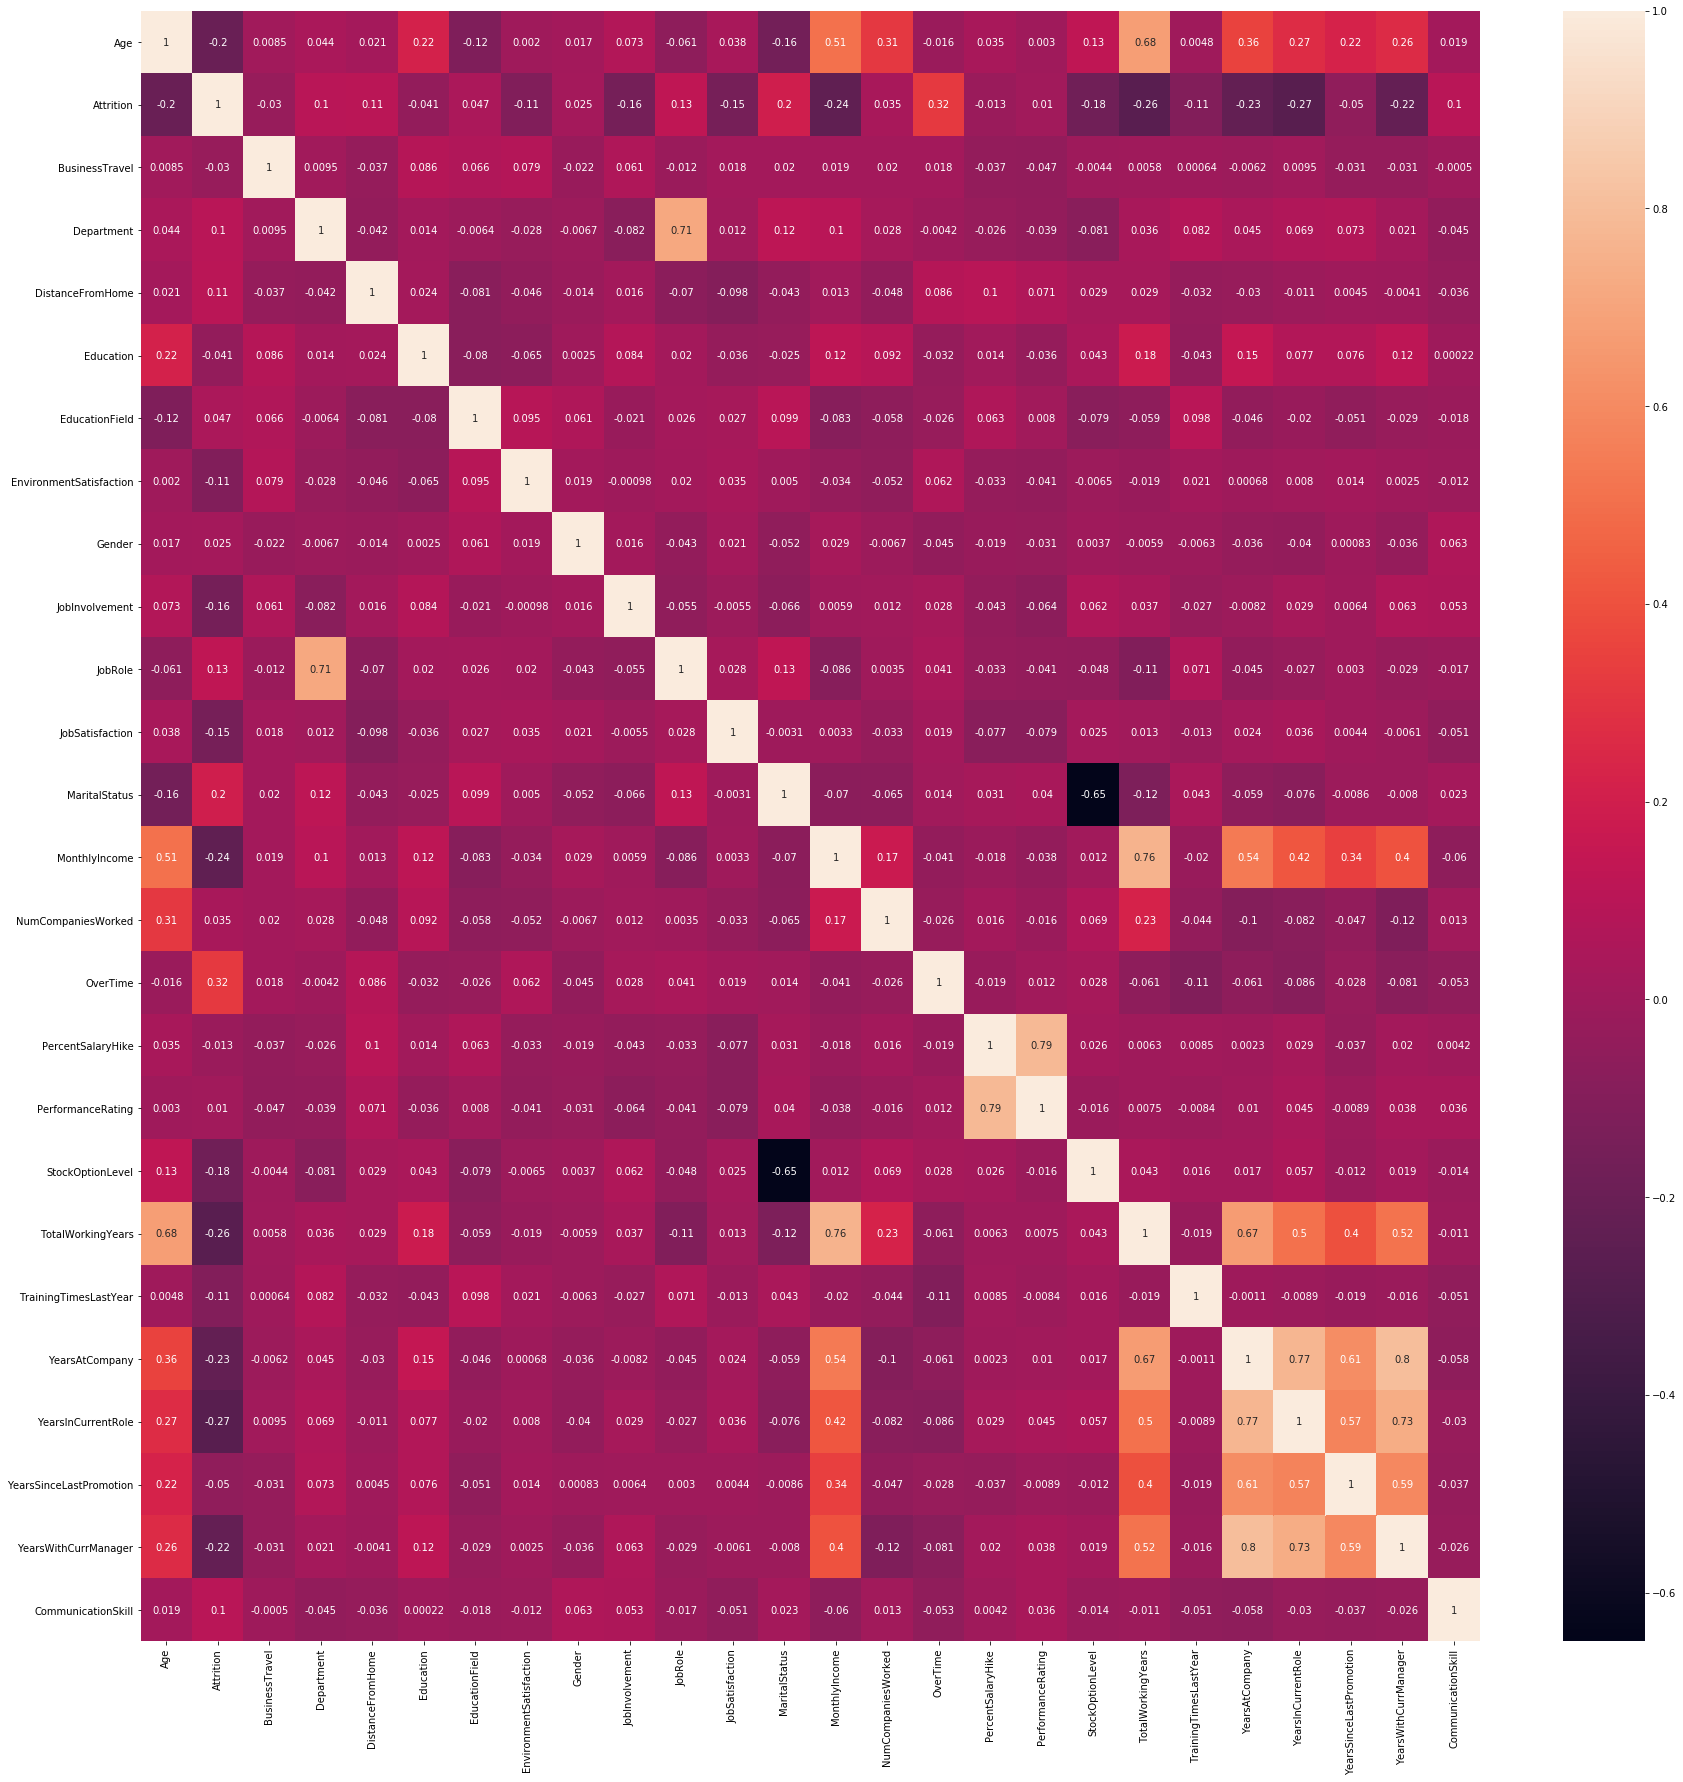

In [7]:
corr_df = new_train.drop('Behaviour',axis=1).corr()
sns.heatmap(corr_df,annot=True)
plt.rcParams['figure.figsize'] = (60,60)

In [8]:
X = new_train.drop('Attrition',axis=1)
X['MonthlyIncome'] = np.cbrt(X['MonthlyIncome'])
X['TotalWorkingYears'] = np.cbrt(X['TotalWorkingYears'])
X['YearsAtCompany'] = np.cbrt(X['YearsAtCompany'])
X['YearsSinceLastPromotion'] = np.cbrt(X['YearsSinceLastPromotion'])
X['DistanceFromHome'] = np.cbrt(X['DistanceFromHome'])
Y = new_train['Attrition']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=1)

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state = 0,max_features = 24)
rf.fit(X_train,Y_train)
print('For Random Forest Classifier')
score = roc_auc_score(Y_train, rf.predict_proba(X_train)[:,1])
print('Train roc_auc_score:',score)
score = roc_auc_score(Y_test, rf.predict_proba(X_test)[:,1])
print("Test roc_auc_score:",score)

For Random Forest Classifier
Train roc_auc_score: 1.0
Test roc_auc_score: 0.9992723075378902


In [10]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state = 0,learning_rate = 1,max_features=5)
gbc.fit(X_train,Y_train)
print('For Gradient Boost Classifier')
score = roc_auc_score(Y_train, gbc.predict_proba(X_train)[:,1])
print('Train roc_auc_score:',score)
score = roc_auc_score(Y_test, gbc.predict_proba(X_test)[:,1])
print("Test roc_auc_score:",score)

For Gradient Boost Classifier
Train roc_auc_score: 1.0
Test roc_auc_score: 0.9894108200341263


In [11]:
dtc = DecisionTreeClassifier(random_state = 0,max_features=24)
dtc.fit(X_train,Y_train)
print('For Decision Tree Classifier')
score = roc_auc_score(Y_train, dtc.predict_proba(X_train)[:,1])
print('Train roc_auc_score:',score)
score = roc_auc_score(Y_test, dtc.predict_proba(X_test)[:,1])
print("Test roc_auc_score:",score)

For Decision Tree Classifier
Train roc_auc_score: 1.0
Test roc_auc_score: 0.9227642276422764


In [12]:
svc = SVC(probability=True,kernel='rbf',C=0.1,gamma=0.001)
svc.fit(X_train,Y_train)
print('For Support Vector Classifier')
score = roc_auc_score(Y_train, svc.predict_proba(X_train)[:,1])
print('Train roc_auc_score:',score)
score = roc_auc_score(Y_test, svc.predict_proba(X_test)[:,1])
print("Test roc_auc_score:",score)

For Support Vector Classifier
Train roc_auc_score: 0.7205986883989441
Test roc_auc_score: 0.6795811167988224


In [13]:
log_reg = LogisticRegression(C = 1,max_iter=1000) 
log_reg.fit(X_train,Y_train)
print('For Logistic Regression')
score = roc_auc_score(Y_train, log_reg.predict_proba(X_train)[:,1])
print('Train roc_auc_score:',score)
score = roc_auc_score(Y_test, log_reg.predict_proba(X_test)[:,1])
print("Test roc_auc_score:",score)

For Logistic Regression
Train roc_auc_score: 0.8546793005618497
Test roc_auc_score: 0.8367292314898458


In [14]:
mlp = MLPClassifier(random_state=0,activation='logistic',max_iter=300,hidden_layer_sizes=(10000,))
mlp.fit(X_train,Y_train)
print('For Mulit-Layer Perceptron')
score = roc_auc_score(Y_train, mlp.predict_proba(X_train)[:,1])
print('Train roc_auc_score:',score)
score = roc_auc_score(Y_test, mlp.predict_proba(X_test)[:,1])
print("Test roc_auc_score:",score)

For Mulit-Layer Perceptron
Train roc_auc_score: 0.856270899392411
Test roc_auc_score: 0.8386028304727492


In [15]:
models = [rf,gbc,dtc,svc,log_reg,mlp]
for model in models:
    model.fit(X,Y)

In [16]:
new_test = test.copy()
for col in new_test.columns:
    if(isinstance(test[col][0],str)):
        new_test[col] = LabelEncoder().fit_transform(new_test[col])
new_test = new_test.drop(['Id','EmployeeNumber'],axis = 1)
X_test = new_test
X_test['MonthlyIncome'] = np.cbrt(X_test['MonthlyIncome'])
X_test['TotalWorkingYears'] = np.cbrt(X_test['TotalWorkingYears'])
X_test['YearsAtCompany'] = np.cbrt(X_test['YearsAtCompany'])
X_test['YearsSinceLastPromotion'] = np.cbrt(X_test['YearsSinceLastPromotion'])
X_test['DistanceFromHome'] = np.cbrt(X_test['DistanceFromHome'])

In [25]:
models = [rf,gbc,dtc,svc,log_reg,mlp]
modelname = ['Random Forest','GradientBoost','DecisionTree','SupportVector','Logistic_reg','MLPClassifier']
for model,name in zip(models,modelname):
    test_prob = model.predict_proba(X_test)[:,1]
    result = pd.DataFrame({'Id':list(test['Id']),'Attrition':list(test_prob)})
    result.to_csv('answers/'+str(name)+'.csv',index=False)